In [ ]:
import os
from keras import models
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras import backend as K

#Loading trained model

In [122]:
model = models.load_model('siamese.h5', compile = False)

#Helper functions

In [ ]:
def show_images(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)

    cv2_imshow(img1)
    cv2_imshow(img2)

In [134]:
def check_forgery(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img1, dsize=(155, 220))
    img2 = cv2.resize(img2, dsize=(155, 220))
    print(img1.shape)
    img1 = img1.astype('int32')
    img2 = img2.astype('int32')
    img1 = img1.reshape((1, 155, 220, 1))
    img2 = img2.reshape((1, 155, 220, 1))
    
    if model.predict((img1, img2))[0][0] <= 1.5:
        return 'Genuine Signatures'
    else:
        return 'Forged Signatures'

#Checking Forgery using the model

In [ ]:
!ls test_data

ls: cannot access 'test_data': No such file or directory


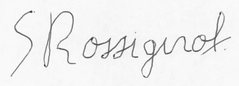

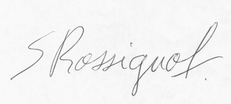

In [119]:
# visualizing the two images
show_images('01101016.png', '01605016.png')

In [130]:
# Checking Forgery
check_forgery('01101016.png', '01605016.png')

(220, 155)
1/1 [==============================] - 0s 20ms/step
12.35234
1/1 [==============================] - 0s 21ms/step


'Forged Signatures'

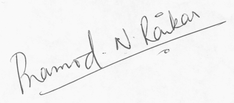

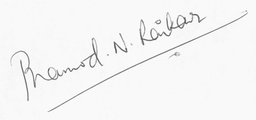

In [131]:
show_images('00901009.png', '00904009.png')

In [132]:
check_forgery('00901009.png', '00904009.png')

(220, 155)
1/1 [==============================] - 0s 19ms/step
1.2721808
1/1 [==============================] - 0s 22ms/step


'Genuine Signatures'

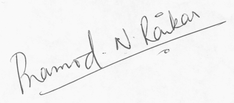

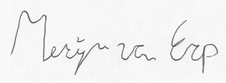

In [116]:
show_images('00901009.png', '03301006.png')

In [133]:
check_forgery('00901009.png', '03301006.png')

(220, 155)
1/1 [==============================] - 0s 22ms/step
5.4295273
1/1 [==============================] - 0s 18ms/step


'Forged Signatures'

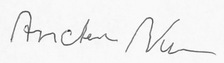

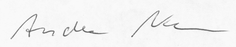

In [136]:
show_images('00504015.png','01501015.png')

In [135]:
check_forgery('00504015.png','01501015.png')

(220, 155)
1/1 [==============================] - 0s 21ms/step


'Forged Signatures'